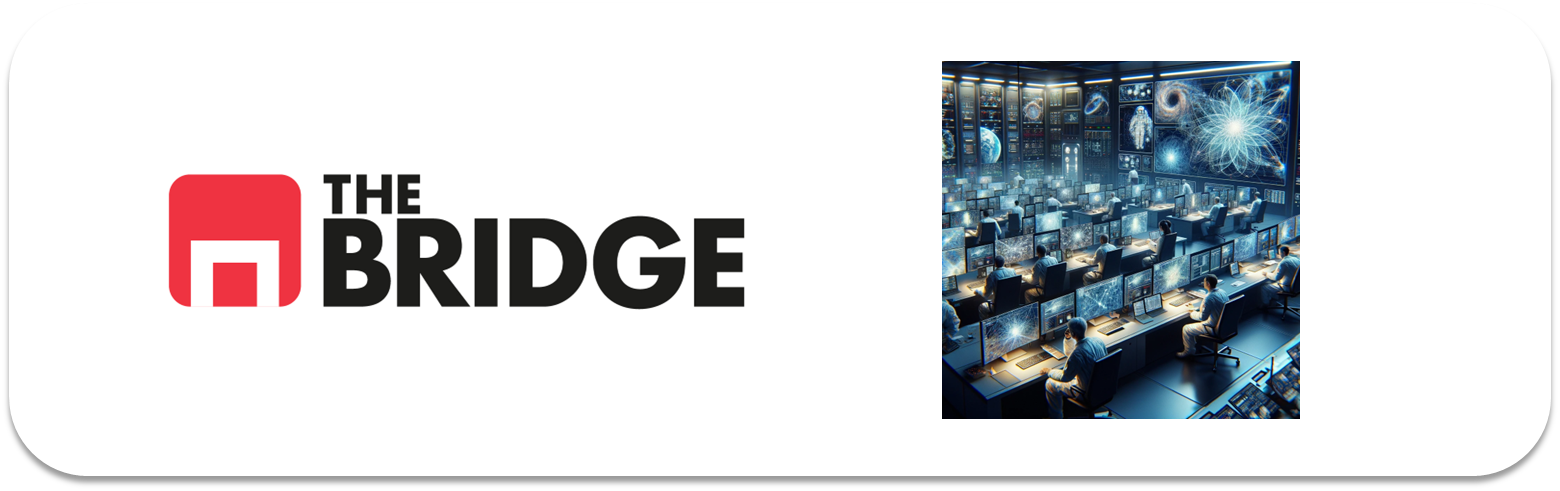

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [1]:
import bootcampviztools as bt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

Preparar los datos

In [2]:
# Directorios
train_dirs = ["data/github_train_0", "data/github_train_1", "data/github_train_2", "data/github_train_3"]
test_dir = "data/github_test"

# Tamaño de las imágenes
img_size = 32

def load_images_from_directory(directory, img_size):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (img_size, img_size))
            images.append(image)
            if 'dog' in filename:
                labels.append(1)  # Perros
            elif 'cat' in filename:
                labels.append(0)  # Gatos
    return np.array(images), np.array(labels)

# Cargar imágenes de entrenamiento
train_images = []
train_labels = []
for dir in train_dirs:
    imgs, lbls = load_images_from_directory(dir, img_size)
    train_images.extend(imgs)
    train_labels.extend(lbls)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Cargar imágenes de prueba
test_images, test_labels = load_images_from_directory(test_dir, img_size)

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding de las etiquetas
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)


In [3]:
print(train_images)

[[[[0.25098039 0.39215686 0.49411765]
   [0.20784314 0.36078431 0.4627451 ]
   [0.24705882 0.40784314 0.50588235]
   ...
   [0.17647059 0.27058824 0.34509804]
   [0.09803922 0.15686275 0.38431373]
   [0.19607843 0.28235294 0.4745098 ]]

  [[0.23921569 0.36078431 0.44313725]
   [0.26666667 0.4        0.47843137]
   [0.29411765 0.43529412 0.51372549]
   ...
   [0.22352941 0.29411765 0.51372549]
   [0.09019608 0.20784314 0.38823529]
   [0.08627451 0.16470588 0.38823529]]

  [[0.25098039 0.37647059 0.47058824]
   [0.29019608 0.43137255 0.52156863]
   [0.24705882 0.40392157 0.49411765]
   ...
   [0.04705882 0.09803922 0.30980392]
   [0.00784314 0.04705882 0.19607843]
   [0.02352941 0.1254902  0.30980392]]

  ...

  [[0.03921569 0.05882353 0.05882353]
   [0.27058824 0.30980392 0.32156863]
   [0.2        0.2627451  0.28627451]
   ...
   [0.27058824 0.37254902 0.40392157]
   [0.20784314 0.29411765 0.3254902 ]
   [0.23529412 0.36078431 0.38431373]]

  [[0.34509804 0.38823529 0.38039216]
   [0.1

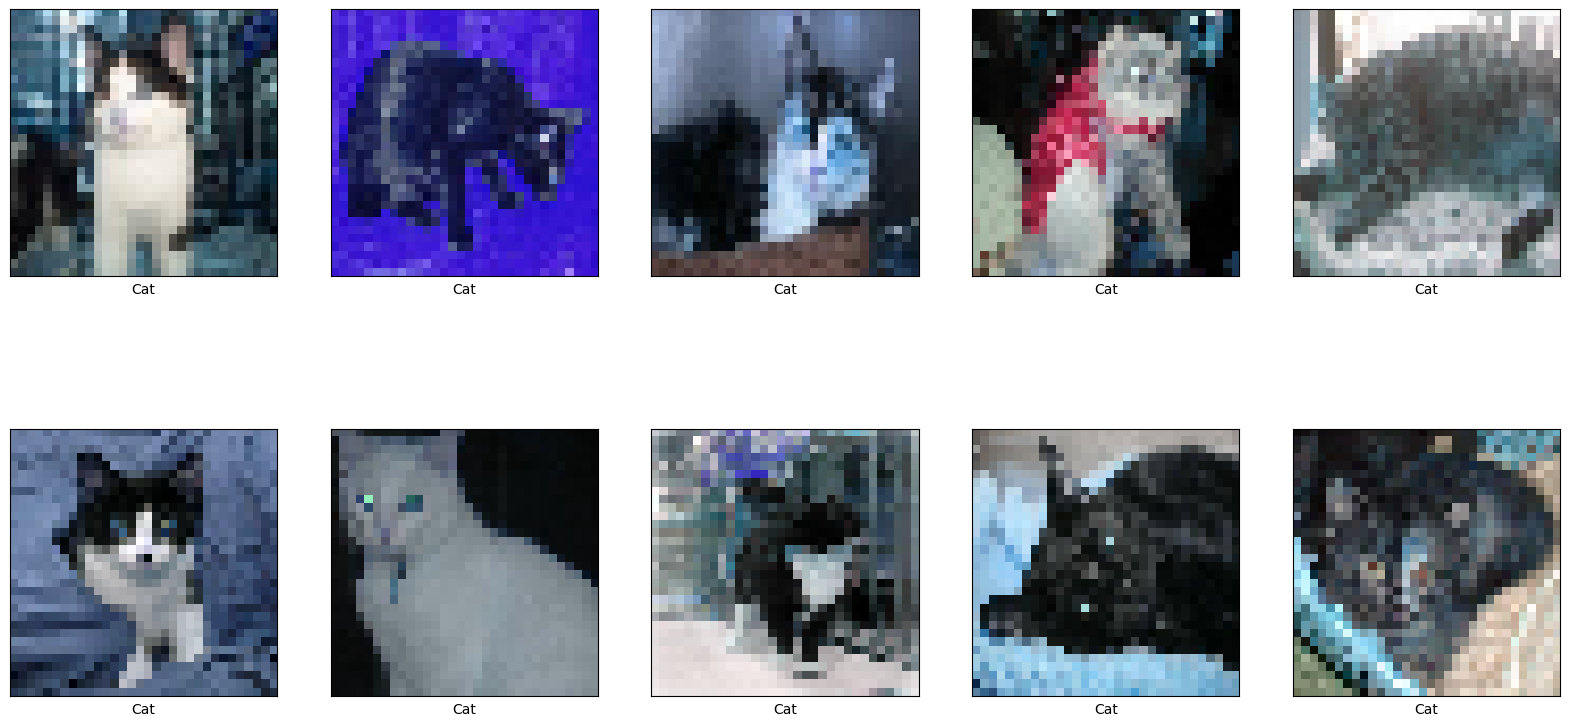

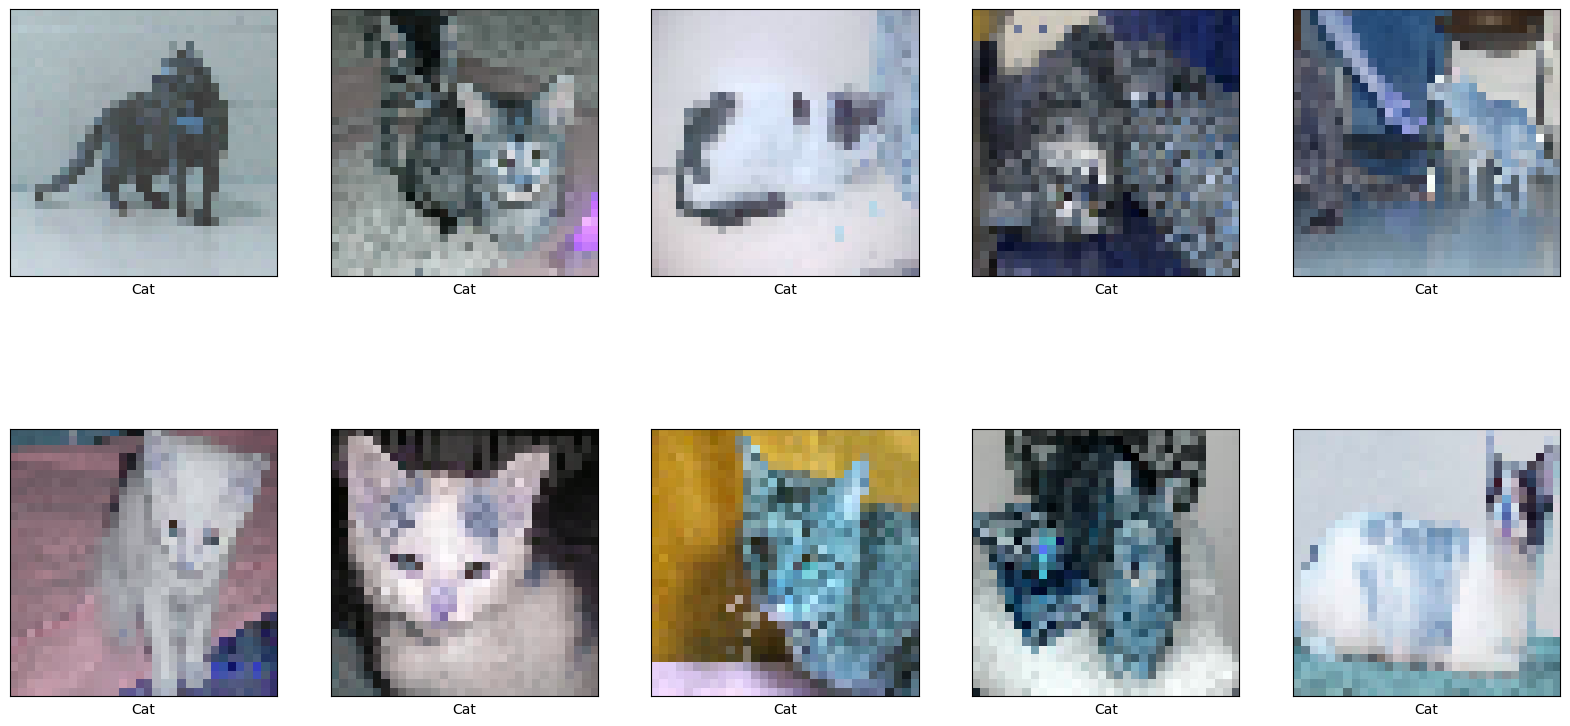

In [4]:
import matplotlib.pyplot as plt

# Función para visualizar imágenes
def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel('Dog' if labels[i] == 1 else 'Cat')
    plt.show()

# Visualizar algunas imágenes de entrenamiento
visualize_images(train_images, np.argmax(train_labels, axis=1))

# Visualizar algunas imágenes de prueba
visualize_images(test_images, np.argmax(test_labels, axis=1))


Construir el modelo de red convolucional

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='same', 
                 activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda capa convolucional
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Aplanamiento
model.add(Flatten())

# Capa densa
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 8)      │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,282 (528.45 KB)

 Trainable params: 135,282 (528.45 KB)

 Non-trainable params: 0 (0.00 B)

Entrenar modelo

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5819 - loss: 0.6896 - val_accuracy: 0.0000e+00 - val_loss: 1.0989
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6218 - loss: 0.6570 - val_accuracy: 0.7688 - val_loss: 0.6247
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6535 - loss: 0.6194 - val_accuracy: 0.0600 - val_loss: 0.9119
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6755 - loss: 0.5901 - val_accuracy: 0.5362 - val_loss: 0.7196
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6952 - loss: 0.5796 - val_accuracy: 0.4950 - val_loss: 0.7770
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7135 - loss: 0.5523 - val_accuracy: 0.1700 - val_loss: 1.1796
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7382 - loss: 0.5213 - val_accuracy: 0.6187 - val_loss: 0.6786


Evaluar modelo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5271 - loss: 0.6652
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

         Cat       0.70      0.48      0.57       500
         Dog       0.60      0.79      0.69       500

    accuracy                           0.64      1000
   macro avg       0.65      0.64      0.63      1000
weighted avg       0.65      0.64      0.63      1000



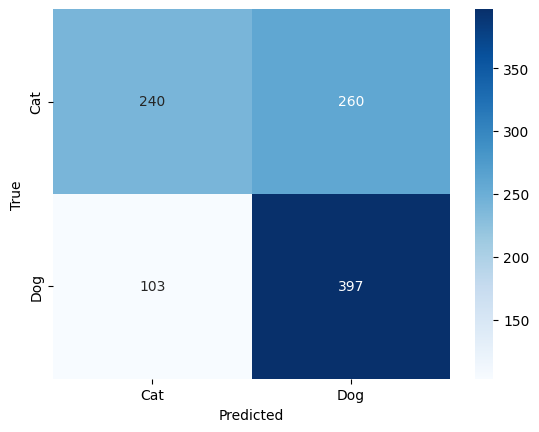

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Predicciones
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Reporte de clasificación
print(classification_report(true_labels, predicted_labels, target_names=['Cat', 'Dog']))

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Seleccionar imágenes difíciles de clasificar

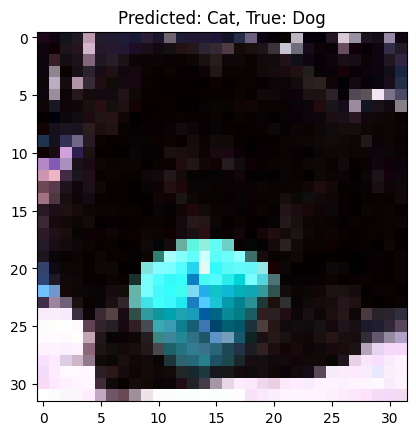

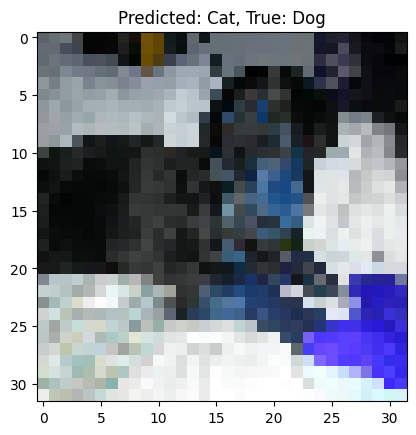

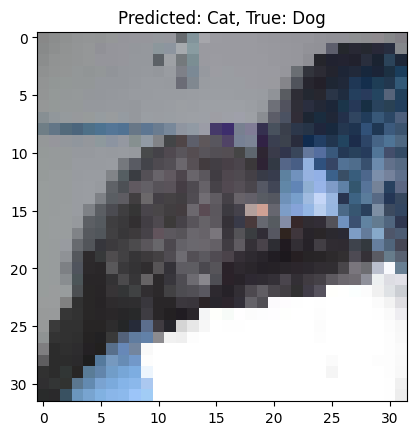

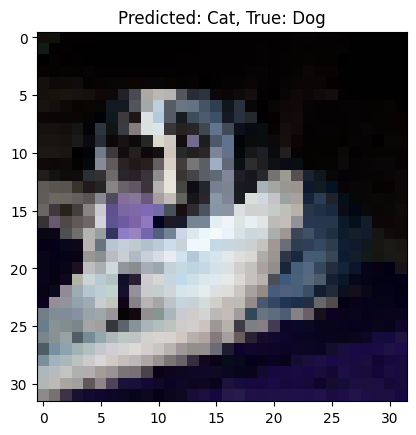

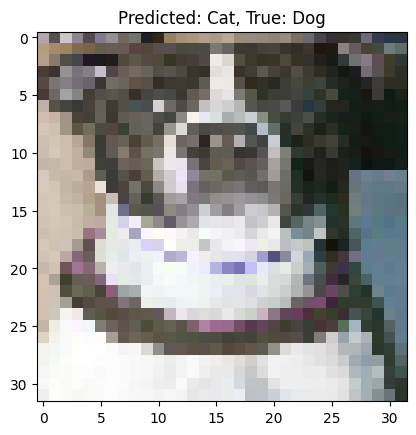

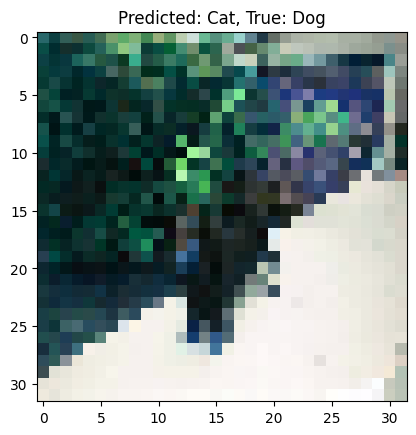

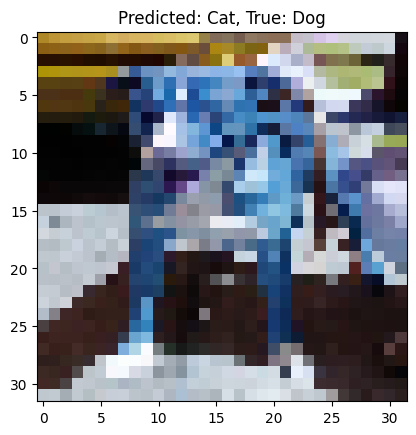

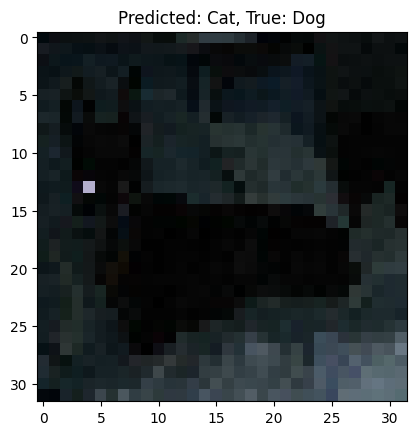

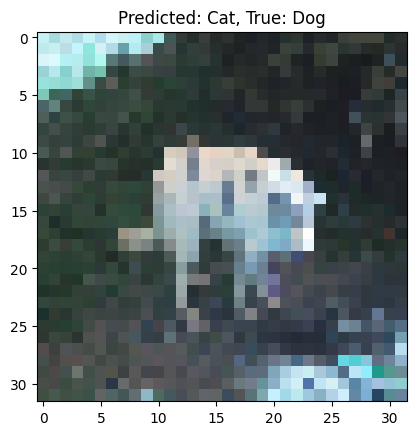

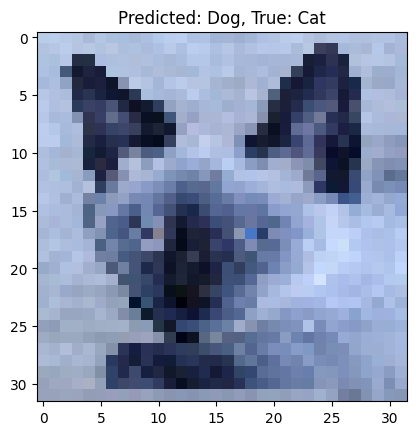

In [8]:
# Obtener las probabilidades de las predicciones incorrectas
incorrect_indices = np.where(predicted_labels != true_labels)[0]
incorrect_probs = predictions[incorrect_indices, np.argmax(predictions[incorrect_indices], axis=1)]

# Seleccionar el 10% con mayor confianza en la clasificación errónea
num_to_select = int(len(incorrect_indices) * 0.1)
difficult_indices = incorrect_indices[np.argsort(-incorrect_probs)[:num_to_select]]

# Mostrar algunas de las imágenes difíciles
for idx in difficult_indices[:10]:
    plt.imshow(test_images[idx])
    plt.title(f"Predicted: {'Dog' if predicted_labels[idx] == 1 else 'Cat'}, True: {'Dog' if true_labels[idx] == 1 else 'Cat'}")
    plt.show()
